<h1>Activity 1</h1>

A
C
G
F
E
Path from initial to goal: ['A', 'E', 'D']


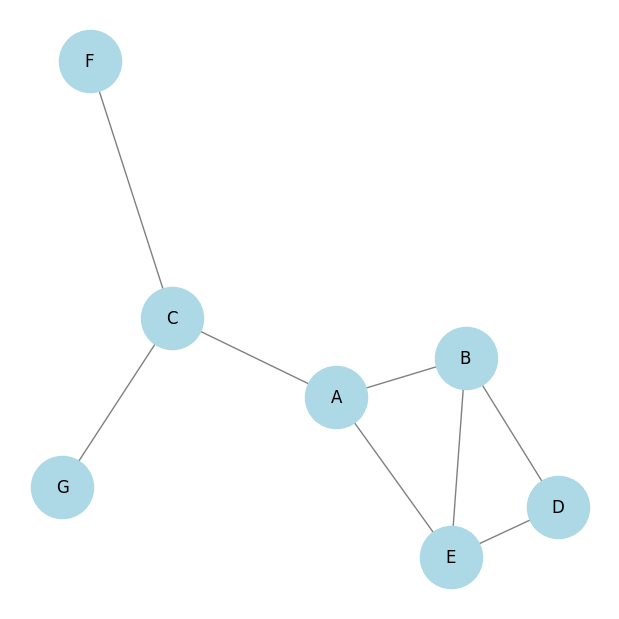

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state
        self.parent = parent
        self.actions = actions  # We are not saving actions themselves, only output states of those actions
        self.totalCost = totalCost

# Graph represented as a dictionary
graph = {
    'A': Node('A', None, ['B', 'E', 'C'], None),
    'B': Node('B', None, ['D', 'E', 'A'], None),
    'C': Node('C', None, ['A', 'F', 'G'], None),
    'D': Node('D', None, ['B', 'E'], None),
    'E': Node('E', None, ['A', 'B', 'D'], None),
    'F': Node('F', None, ['C'], None),
    'G': Node('G', None, ['C'], None)
}

def DFS():
    initialState = 'A'
    goalState = 'D'

    frontier = [initialState]  # Stack-based approach for DFS
    explored = []

    while frontier:
        currentNode = frontier.pop()  # Pop from the end (LIFO)
        print(currentNode)
        explored.append(currentNode)

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode  # Set parent for path tracking
                if graph[child].state == goalState:
                    return actionSequence(graph, initialState, goalState)
                frontier.append(child)

    return None

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent

    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent

    solution.reverse()
    return solution

def draw_graph():
    G = nx.Graph()
    for node in graph:
        for neighbor in graph[node].actions:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    plt.show()

# Run DFS
path = DFS()
print("Path from initial to goal:", path)

draw_graph()


<h1>Activity 2</h1>

Exploring: D
Exploring: B
Exploring: E
Exploring: A
Path from initial to goal: ['D', 'B', 'A', 'C']
Explored node sequence: ['D', 'B', 'E', 'A']


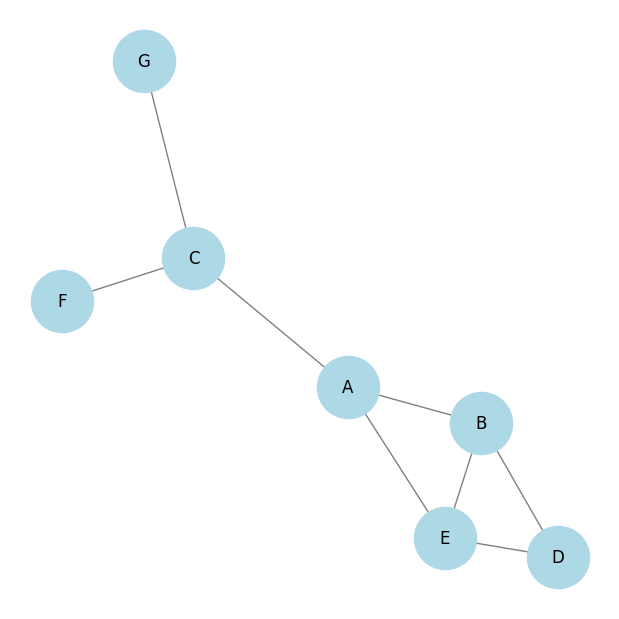

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque  # For queue implementation in BFS

class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state
        self.parent = parent
        self.actions = actions  # We are not saving actions themselves, only output states of those actions
        self.totalCost = totalCost

# Graph represented as a dictionary
graph = {
    'A': Node('A', None, ['B', 'E', 'C'], None),
    'B': Node('B', None, ['D', 'E', 'A'], None),
    'C': Node('C', None, ['A', 'F', 'G'], None),
    'D': Node('D', None, ['B', 'E'], None),
    'E': Node('E', None, ['A', 'B', 'D'], None),
    'F': Node('F', None, ['C'], None),
    'G': Node('G', None, ['C'], None)
}

def BFS():
    initialState = 'D'  # Changed initial state to 'D'
    goalState = 'C'     # Changed goal state to 'C'

    frontier = deque([initialState])  # Queue-based approach for BFS
    explored = []

    while frontier:
        currentNode = frontier.popleft()  # Pop from the front (FIFO)
        print("Exploring:", currentNode)
        explored.append(currentNode)

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode  # Set parent for path tracking
                if graph[child].state == goalState:
                    return actionSequence(graph, initialState, goalState), explored
                frontier.append(child)

    return None, explored

def actionSequence(graph, initialState, goalState):
    solution = [goalState]
    currentParent = graph[goalState].parent

    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent

    solution.reverse()
    return solution

def draw_graph():
    G = nx.Graph()
    for node in graph:
        for neighbor in graph[node].actions:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    plt.show()

# Run BFS
path, explored = BFS()
print("Path from initial to goal:", path)
print("Explored node sequence:", explored)

draw_graph()

<h1>Task 1 using networkx</h1>

DFS Path from Arad to Bucharest: ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Fagaras', 'Bucharest']


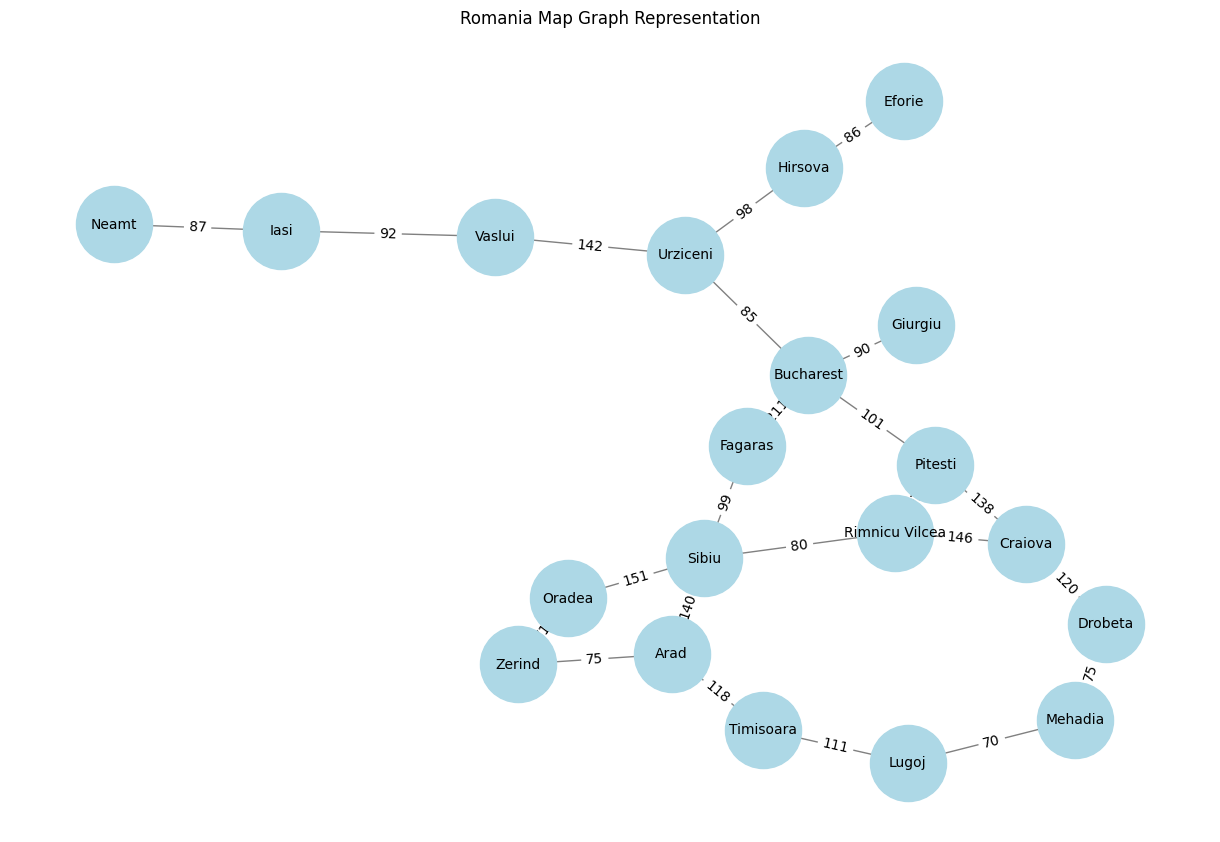

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor in graph[start]:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, goal, path.copy(), visited.copy())
            if new_path:
                return new_path

    return None

# Define the Romania Map as a graph
romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Urziceni': 85, 'Giurgiu': 90},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

# Convert dictionary to NetworkX graph
graph = nx.Graph()
for node, neighbors in romania_map.items():
    for neighbor, cost in neighbors.items():
        graph.add_edge(node, neighbor, weight=cost)

# Perform DFS to find a path from Arad to Bucharest
path = dfs(romania_map, 'Arad', 'Bucharest')
print("DFS Path from Arad to Bucharest:", path)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.title("Romania Map Graph Representation")
plt.show()


<h1>Task 1 using dictionary</h1>

In [20]:
class Node:
    def __init__(self, state, parent, actions, totalCost):
        self.state = state  # Instance variable unique to each node
        self.parent = parent
        self.actions = actions  # We are not saving actions themselves, only output states of those actions
        self.totalCost = totalCost


# Graph represented as a dictionary, where keys are states and values are Node objects
graph = {
    'A': Node('A', None, ['B', 'E', 'C'], None),
    'B': Node('B', None, ['D', 'E', 'A'], None),
    'C': Node('C', None, ['A', 'F', 'G'], None),
    'D': Node('D', None, ['B', 'E'], None),
    'E': Node('E', None, ['A', 'B', 'D'], None),
    'F': Node('F', None, ['C'], None),
    'G': Node('G', None, ['C'], None)
}


def DFS():
    initialState = 'A'
    goalState = 'D'

    frontier = [initialState]  # Stack-based approach for DFS
    explored = []

    while len(frontier) != 0:
        currentNode = frontier.pop(len(frontier) - 1)  # Pop from the end (LIFO)
        print(currentNode)

        explored.append(currentNode)
        currentChildren = 0

        for child in graph[currentNode].actions:
            if child not in frontier and child not in explored:
                graph[child].parent = currentNode  # Set parent for path tracking
                if graph[child].state == goalState:
                    print(explored)
                    return actionSequence(graph, initialState, goalState)

                currentChildren += 1
                frontier.append(child)

        if currentChildren == 0:
            del explored[len(explored) - 1]


def actionSequence(graph, initialState, goalState):
    # Returns a list of states starting from the goal state moving upwards
    # through parents until the root node is reached
    solution = [goalState]
    currentParent = graph[goalState].parent

    while currentParent is not None:
        solution.append(currentParent)
        currentParent = graph[currentParent].parent

    solution.reverse()
    return solution


# Run DFS
path = DFS()
print("Path from initial to goal:", path)


A
C
G
F
E
['A', 'C', 'E']
Path from initial to goal: ['A', 'E', 'D']


<h1>Task 2 using networkx</h1>

Valid words found: {'NOTE', 'STONED', 'SAND'}


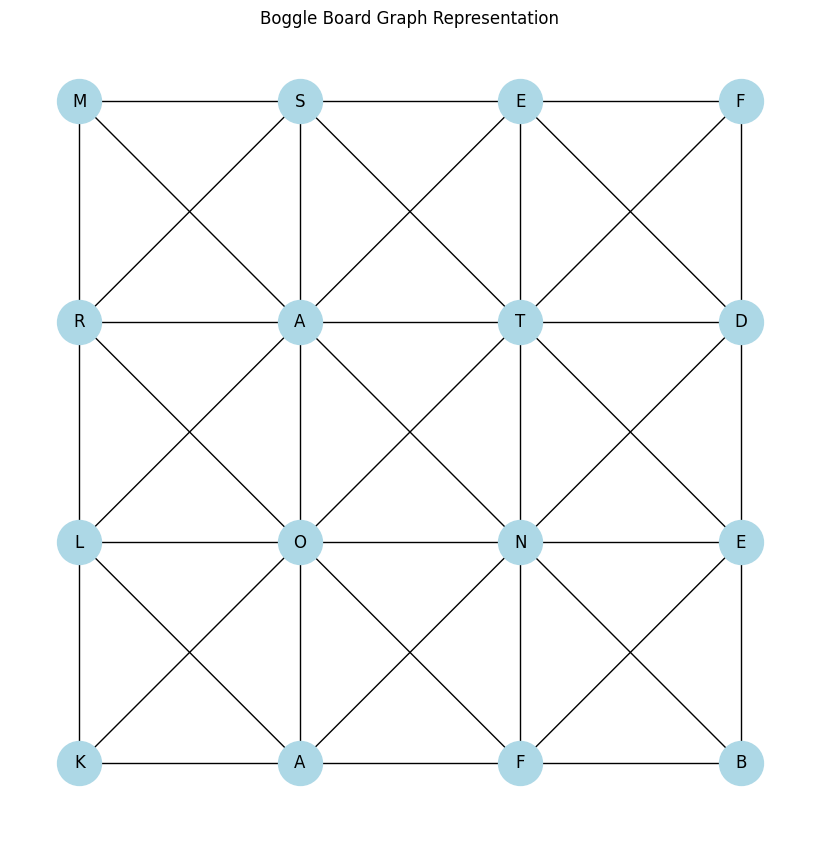

In [18]:

import networkx as nx
import matplotlib.pyplot as plt

# Boggle Board
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

# Dictionary of valid words
valid_words = {"START", "NOTE", "SAND", "STONED"}

# Directions for moving in 8 possible ways
directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1),
              (0, 1), (1, -1), (1, 0), (1, 1)]

# Create a graph
G = nx.Graph()

# Add nodes
rows, cols = len(board), len(board[0])
for i in range(rows):
    for j in range(cols):
        G.add_node((i, j), letter=board[i][j])

# Add edges in 8 directions
for i in range(rows):
    for j in range(cols):
        for dx, dy in directions:
            ni, nj = i + dx, j + dy
            if 0 <= ni < rows and 0 <= nj < cols:
                G.add_edge((i, j), (ni, nj))

# Function to perform DFS and find words
def dfs(path, word, visited, results):
    x, y = path[-1]
    word += board[x][y]

    if word in valid_words:
        results.add(word)

    if len(word) > max(map(len, valid_words)):
        return

    for neighbor in G.neighbors((x, y)):
        if neighbor not in visited:
            dfs(path + [neighbor], word, visited | {neighbor}, results)

# Find all words
found_words = set()
for i in range(rows):
    for j in range(cols):
        dfs([(i, j)], "", {(i, j)}, found_words)

print("Valid words found:", found_words)

# Draw Graph
plt.figure(figsize=(8, 8))
pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}  # Arrange like a board
labels = {node: board[node[0]][node[1]] for node in G.nodes()}  # Label with letters

nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color="lightblue", font_size=12)
plt.title("Boggle Board Graph Representation")
plt.show()




<h1>Task 2 using dictionary</h1>

In [19]:
def is_valid(x, y, visited, board):
    return 0 <= x < len(board) and 0 <= y < len(board[0]) and not visited[x][y]

def dfs(board, x, y, node, path, visited, found_words, word_set):
    if node.get("is_word", False):
        found_words.add(path)

    visited[x][y] = True

    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if is_valid(nx, ny, visited, board) and board[nx][ny] in node:
            dfs(board, nx, ny, node[board[nx][ny]], path + board[nx][ny], visited, found_words, word_set)

    visited[x][y] = False

def build_trie(words):
    root = {}
    for word in words:
        node = root
        for char in word:
            if char not in node:
                node[char] = {}
            node = node[char]
        node["is_word"] = True
    return root

def find_words(board, dictionary):
    trie = build_trie(dictionary)
    found_words = set()

    for i in range(len(board)):
        for j in range(len(board[0])):
            char = board[i][j]
            if char in trie:
                visited = [[False for _ in range(len(board[0]))] for _ in range(len(board))]
                dfs(board, i, j, trie[char], char, visited, found_words, dictionary)

    return found_words

# Boggle Board
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

dictionary = {"START", "NOTE", "SAND", "STONED"}

valid_words = find_words(board, dictionary)
print("Valid words found:", valid_words)

Valid words found: {'NOTE', 'STONED', 'SAND'}
